In [1]:
import pandas as pd
import os

#### Read Data
-Task- merging 12 months of sales in to singe file

In [2]:
path = "./Sales_Data"
files = [file for file in os.listdir(path) if not file.startswith('.')] # Ignore hidden files
files

['Sales_April_2019.csv',
 'Sales_August_2019.csv',
 'Sales_December_2019.csv',
 'Sales_February_2019.csv',
 'Sales_January_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv',
 'Sales_March_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_September_2019.csv']

In [3]:
all_months_data = pd.DataFrame()
for file in files:
    current_data = pd.read_csv(path+"/"+file)
    all_months_data = pd.concat([all_months_data, current_data])
    
all_months_data.to_csv("all_data.csv", index=False)

In [4]:
all_data = pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [5]:
len(all_data)

186850

#### Q1. What was the best month for sales? how much was earned that month?

In [6]:
df = all_data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


#### Clean Data

In [7]:
# check nan data
nan_df = df[df.isna().any(axis=1)]
nan_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df = df.dropna()

In [9]:
all_data=df[df['Order Date'].str[0:2] != 'Or']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [10]:
#make to int
all_data['Quantity Ordered'] = all_data['Quantity Ordered'].astype('float')
#make to int
all_data['Price Each'] = all_data['Price Each'].astype('float')
all_data.head()

<ipython-input-10-30ef29a79959>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Quantity Ordered'] = all_data['Quantity Ordered'].astype('float')
<ipython-input-10-30ef29a79959>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Price Each'] = all_data['Price Each'].astype('float')


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


#### Add month column

In [11]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  object 
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  float64
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
dtypes: float64(2), object(4)
memory usage: 9.9+ MB


In [12]:
all_data['month'] = all_data['Order Date'].str[0:2]
all_data.head()

<ipython-input-12-a1548c202279>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['month'] = all_data['Order Date'].str[0:2]


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


In [13]:
all_data.groupby('month').size().reset_index(name='counts').sort_values(by='counts', ascending=False)

,month,counts
11,12,24984
9,10,20282
3,04,18279
10,11,17573
4,05,16566
2,03,15153
6,07,14293
5,06,13554
1,02,11975
7,08,11961


#### Add sales column

In [14]:
all_data['sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

<ipython-input-14-26bc6f96e433>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['sales'] = all_data['Quantity Ordered'] * all_data['Price Each']


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,23.90
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04,99.99
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,600.00
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,11.99
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04,11.99


In [15]:
results = all_data.groupby('month')['sales'].sum().reset_index(name='sales')
results.sort_values(by='sales', ascending=False)

,month,sales
11,12,4.613443e+06
9,10,3.736727e+06
3,04,3.390670e+06
10,11,3.199603e+06
4,05,3.152607e+06
2,03,2.807100e+06
6,07,2.647776e+06
5,06,2.577802e+06
7,08,2.244468e+06
1,02,2.202022e+06


In [16]:
results

,month,sales
0,01,1.822257e+06
1,02,2.202022e+06
2,03,2.807100e+06
3,04,3.390670e+06
4,05,3.152607e+06
5,06,2.577802e+06
6,07,2.647776e+06
7,08,2.244468e+06
8,09,2.097560e+06
9,10,3.736727e+06


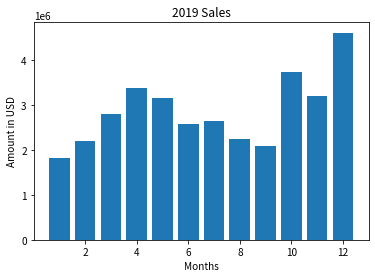

In [25]:
import matplotlib.pyplot as plt
months= range(1,13)
plt.bar(months, results['sales'])
plt.title('2019 Sales')
plt.xlabel('Months')
plt.ylabel('Amount in USD')
plt.show()

#### 2.What city had the hights number of sales?

- Add city Column

In [36]:
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]

#use .apply()
#all_data['city'] = all_data['Purchase Address'].apply(lambda x: x.split(',')[1])
all_data['city'] = all_data['Purchase Address'].apply(lambda x: f'{get_city(x)} ({get_state(x)})')
all_data.head()

<ipython-input-36-3bc72f51d92b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['city'] = all_data['Purchase Address'].apply(lambda x: f'{get_city(x)} ({get_state(x)})')


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04,99.99,Boston (MA)
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04,11.99,Los Angeles (CA)


In [43]:
city_results = all_data.groupby('city')['sales'].sum().reset_index(name='sales')
city_results.sort_values(by='sales', ascending=False)
city_results.head()

,city,sales
0,Atlanta (GA),2.795499e+06
1,Austin (TX),1.819582e+06
2,Boston (MA),3.661642e+06
3,Dallas (TX),2.767975e+06
4,Los Angeles (CA),5.452571e+06


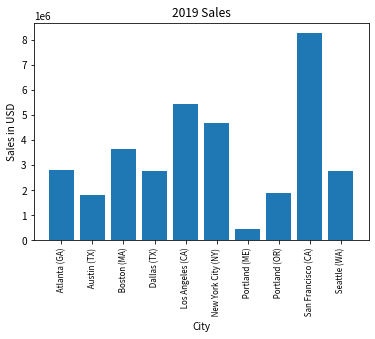

In [46]:
cities = city_results['city'].unique()
plt.bar(cities, city_results['sales'])
plt.xticks(cities, rotation ='vertical', size = 8)
plt.title('2019 Sales')
plt.xlabel('City')
plt.ylabel('Sales in USD')
plt.show()

#### 3. What time should we display advertisements to maximize likelihood of customer's buying product?

In [50]:
#all_data['city'] = all_data['Purchase Address'].apply(lambda x: x.split(',')[1])
all_data['time'] = all_data['Order Date'].apply(lambda x: x.split(' ')[1])
all_data

<ipython-input-50-85a986df4ac7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['time'] = all_data['Order Date'].apply(lambda x: x.split(' ')[1])


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city,time
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,23.90,Dallas (TX),08:46
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04,99.99,Boston (MA),22:30
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,600.00,Los Angeles (CA),14:38
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,11.99,Los Angeles (CA),14:38
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04,11.99,Los Angeles (CA),09:27
...,...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3.0,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09,8.97,Los Angeles (CA),20:56
186846,259354,iPhone,1.0,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09,700.00,San Francisco (CA),16:00
186847,259355,iPhone,1.0,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09,700.00,San Francisco (CA),07:39
186848,259356,34in Ultrawide Monitor,1.0,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09,379.99,San Francisco (CA),17:30


In [54]:
time_result=all_data.groupby('time').sum()
time_result.sort_values(by='sales',ascending=False).head(10)

,Quantity Ordered,Price Each,sales
time,,,
19:01,269.0,54358.35,54503.14
12:21,270.0,53717.10,54181.96
19:16,239.0,53902.99,54156.39
20:13,269.0,52846.58,53149.51
19:20,281.0,52691.86,52903.41
19:21,259.0,52193.69,52555.99
20:35,270.0,52034.89,52236.86
19:15,260.0,50643.14,50717.03
19:47,261.0,50366.89,50640.71


In [57]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data.head()

<ipython-input-57-3f371bb079c1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])
<ipython-input-57-3f371bb079c1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Hour'] = all_data['Order Date'].dt.hour


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city,time,Hour
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",04,23.90,Dallas (TX),08:46,8
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",04,99.99,Boston (MA),22:30,22
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,600.00,Los Angeles (CA),14:38,14
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,11.99,Los Angeles (CA),14:38,14
5,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",04,11.99,Los Angeles (CA),09:27,9


In [65]:
hour_result = all_data.groupby('Hour').sum()['sales'].reset_index(name='sales')
hour_result.sort_values(by='sales', ascending=False)

,Hour,sales
19,19,2412938.54
12,12,2316821.34
11,11,2300610.24
20,20,2281716.24
18,18,2219348.30
13,13,2155389.80
17,17,2129361.61
14,14,2083672.73
21,21,2042000.86
10,10,1944286.77


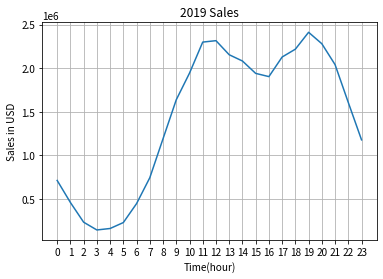

In [69]:
plt.plot(hour_result['Hour'], hour_result['sales'])
plt.title('2019 Sales')
plt.xticks(hour_result['Hour'])
plt.xlabel('Time(hour)')
plt.ylabel('Sales in USD')
plt.grid()
plt.show()

In [73]:
hour_result = all_data.groupby('Hour').count()['Quantity Ordered'].reset_index(name='quantity')
#hour_result.sort_values(by='sales', ascending=False)
hour_result

,Hour,quantity
0,0,3910
1,1,2350
2,2,1243
3,3,831
4,4,854
5,5,1321
6,6,2482
7,7,4011
8,8,6256
9,9,8748


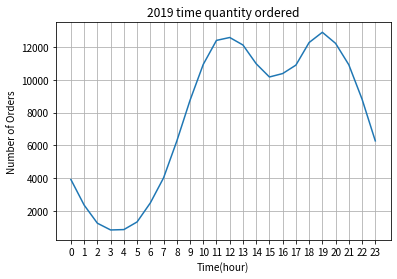

In [75]:
plt.plot(hour_result['Hour'], hour_result['quantity'])
plt.title('2019 time quantity ordered')
plt.xticks(hour_result['Hour'])
plt.xlabel('Time(hour)')
plt.ylabel('Number of Orders')
plt.grid()
plt.show()

#### 4.What products are most often sold together?

In [80]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [85]:
df = all_data[all_data['Order ID'].duplicated(keep=False)]
df.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city,time,Hour
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,600.00,Los Angeles (CA),14:38,14
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,11.99,Los Angeles (CA),14:38,14
18,176574,Google Phone,1.0,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",04,600.00,Los Angeles (CA),19:42,19
19,176574,USB-C Charging Cable,1.0,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",04,11.95,Los Angeles (CA),19:42,19
30,176585,Bose SoundSport Headphones,1.0,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",04,99.99,Boston (MA),11:31,11
31,176585,Bose SoundSport Headphones,1.0,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",04,99.99,Boston (MA),11:31,11
32,176586,AAA Batteries (4-pack),2.0,2.99,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",04,5.98,San Francisco (CA),17:00,17
33,176586,Google Phone,1.0,600.00,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",04,600.00,San Francisco (CA),17:00,17
119,176672,Lightning Charging Cable,1.0,14.95,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",04,14.95,New York City (NY),11:07,11
120,176672,USB-C Charging Cable,1.0,11.95,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",04,11.95,New York City (NY),11:07,11


In [91]:
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df_grouped = df[['Order ID', 'Grouped']].drop_duplicates()
df_grouped.head(20)

,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
129,176681,"Apple Airpods Headphones,ThinkPad Laptop"
138,176689,"Bose SoundSport Headphones,AAA Batteries (4-pack)"
189,176739,"34in Ultrawide Monitor,Google Phone"
225,176774,"Lightning Charging Cable,USB-C Charging Cable"
233,176781,"iPhone,Lightning Charging Cable"


In [95]:
df_grouped.groupby('Grouped').count().sort_values(by='Order ID',ascending=False)

,Order ID
Grouped,
"iPhone,Lightning Charging Cable",886
"Google Phone,USB-C Charging Cable",857
"iPhone,Wired Headphones",361
"Vareebadd Phone,USB-C Charging Cable",312
"Google Phone,Wired Headphones",303
...,...
"LG Dryer,Flatscreen TV",1
"LG Dryer,AAA Batteries (4-pack)",1
"LG Dryer,27in FHD Monitor",1


In [99]:
df['Grouped'].head(20)

3                          Google Phone,Wired Headphones
4                          Google Phone,Wired Headphones
18                     Google Phone,USB-C Charging Cable
19                     Google Phone,USB-C Charging Cable
30                            Bose SoundSport Headphones
32                   AAA Batteries (4-pack),Google Phone
33                   AAA Batteries (4-pack),Google Phone
119        Lightning Charging Cable,USB-C Charging Cable
120        Lightning Charging Cable,USB-C Charging Cable
129             Apple Airpods Headphones,ThinkPad Laptop
130             Apple Airpods Headphones,ThinkPad Laptop
138    Bose SoundSport Headphones,AAA Batteries (4-pack)
139    Bose SoundSport Headphones,AAA Batteries (4-pack)
189                  34in Ultrawide Monitor,Google Phone
190                  34in Ultrawide Monitor,Google Phone
225        Lightning Charging Cable,USB-C Charging Cable
226        Lightning Charging Cable,USB-C Charging Cable
233                      iPhone

In [96]:
from itertools import combinations
from collections import Counter

In [103]:

count = Counter()
for row in df['Grouped']:
    row_list = row.split(',')
    #count.update(Counter(combinations(row_list, 2)))
    count.update(Counter(combinations(row_list, 3)))
    
#print(count)
for data in count.most_common(10):
    print(data)

(('Google Phone', 'USB-C Charging Cable', 'Wired Headphones'), 265)
(('iPhone', 'Lightning Charging Cable', 'Wired Headphones'), 193)
(('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones'), 146)
(('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones'), 109)
(('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones'), 101)
(('iPhone', 'Apple Airpods Headphones', 'Wired Headphones'), 86)
(('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones'), 75)
(('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones'), 50)
(('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones'), 20)
(('Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones'), 17)


#### 5.What product sold the most?

In [104]:
df.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city,time,Hour,Grouped
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,600.00,Los Angeles (CA),14:38,14,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,11.99,Los Angeles (CA),14:38,14,"Google Phone,Wired Headphones"
18,176574,Google Phone,1.0,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",04,600.00,Los Angeles (CA),19:42,19,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1.0,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",04,11.95,Los Angeles (CA),19:42,19,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1.0,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",04,99.99,Boston (MA),11:31,11,Bose SoundSport Headphones
32,176586,AAA Batteries (4-pack),2.0,2.99,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",04,5.98,San Francisco (CA),17:00,17,"AAA Batteries (4-pack),Google Phone"
33,176586,Google Phone,1.0,600.00,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",04,600.00,San Francisco (CA),17:00,17,"AAA Batteries (4-pack),Google Phone"
119,176672,Lightning Charging Cable,1.0,14.95,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",04,14.95,New York City (NY),11:07,11,"Lightning Charging Cable,USB-C Charging Cable"
120,176672,USB-C Charging Cable,1.0,11.95,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",04,11.95,New York City (NY),11:07,11,"Lightning Charging Cable,USB-C Charging Cable"
129,176681,Apple Airpods Headphones,1.0,150.00,2019-04-20 10:39:00,"331 Cherry St, Seattle, WA 98101",04,150.00,Seattle (WA),10:39,10,"Apple Airpods Headphones,ThinkPad Laptop"


In [131]:
all_data.groupby('Product').sum()[['Quantity Ordered']].sort_values(by='Quantity Ordered', ascending=False)

,Quantity Ordered
Product,
AAA Batteries (4-pack),31017.0
AA Batteries (4-pack),27635.0
USB-C Charging Cable,23975.0
Lightning Charging Cable,23217.0
Wired Headphones,20557.0
Apple Airpods Headphones,15661.0
Bose SoundSport Headphones,13457.0
27in FHD Monitor,7550.0
iPhone,6849.0


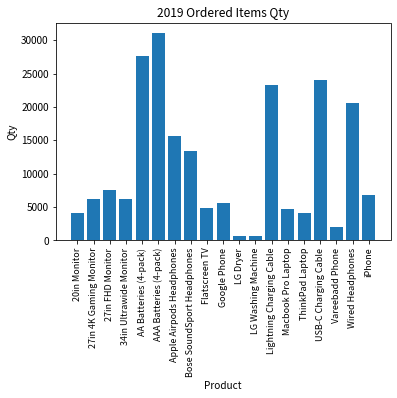

In [138]:
product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']
products = [product for product, df in product_group]
plt.bar(products, quantity_ordered)
plt.title('2019 Ordered Items Qty', size=12)
plt.ylabel('Qty')
plt.xlabel('Product')
plt.xticks(products, rotation=90,size= 9)
plt.show()

In [139]:
prices = all_data.groupby('Product').mean()['Price Each']
print(prices)

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64


<ipython-input-143-b8456dbb4e93>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation=90, size = 9)


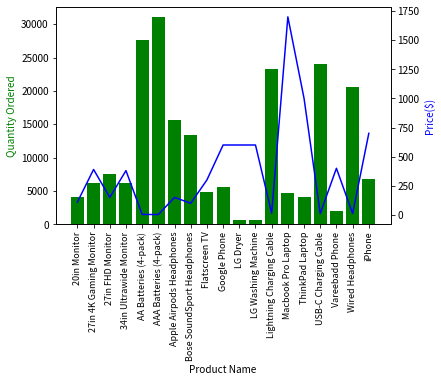

In [143]:
prices = all_data.groupby('Product').mean()['Price Each']
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color = 'g')
ax2.plot(products, prices, 'b-')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax1.set_xticklabels(products, rotation=90, size = 9)
ax2.set_ylabel('Price($)', color='b')


plt.show()

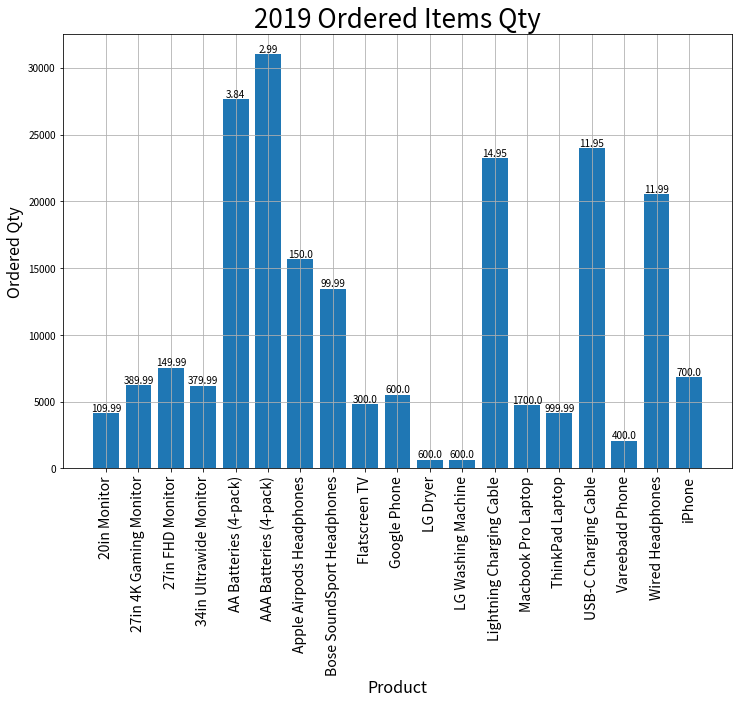

In [182]:
product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']
products = [product for product, df in product_group]
prices = all_data.groupby('Product').mean()['Price Each']

plt.figure(figsize=(12,8))
ax = plt.bar(products, quantity_ordered)
plt.title('2019 Ordered Items Qty', size=26)
plt.xlabel('Product', size= 16)
plt.ylabel('Ordered Qty',size= 16)
plt.xticks(products, rotation=90,size= 14)
plt.grid()
def autolabel(rects):
    for i,rect in enumerate(rects):
        height = rect.get_height()
        price = [price for price in prices]
        plt.text(rect.get_x() + rect.get_width()/2,height, round(price[i],2),ha='center', va='bottom')
autolabel(ax)        
plt.show()